This code reads the simulted flow from the watout dat file from SWAT and observed csv files and plots the graphs.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

CSV data loaded successfully.
Length of Flow_obs from CSV: 6574
Length of Flow_sim from DAT: 8401
Final minimum length of data for comparison: 6574


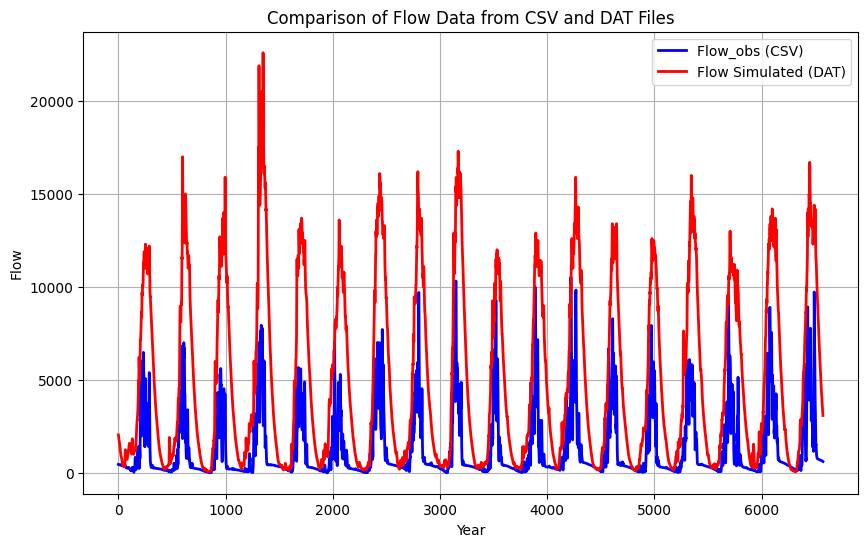

In [8]:
# Define the file paths
observed = r"C:\Users\m.melesse\OneDrive - Washington State University (email.wsu.edu)\Current\SWAT\SWAT_Input\observed.csv"  # Replace with your actual CSV file path
simulated = r"C:\Users\m.melesse\OneDrive - Washington State University (email.wsu.edu)\Current\SWAT\SWAT_Input\test_swat4\Scenarios\Default\TxtInOut\watout.dat"  # Replace with your actual .dat file path

# Read the CSV file
try:
    csv_data = pd.read_csv(observed)
    print("CSV data loaded successfully.")
except Exception as e:
    print("Error loading CSV:", e)

# Extract the 'Year' and 'Flow_obs' columns from the CSV
year = csv_data['Year']  # Assuming the column name is 'Year'
flow_obs = csv_data['Flow_obs']  # Assuming the column name is 'Flow_obs'

# Read the DAT file
try:
    with open(simulated, 'r') as file:
        lines = file.readlines()

    # Skip the first 6 lines, and extract data from columns 20 to 29
    data_lines = lines[6:]  # Get all lines after the header

    # Extract and convert the relevant columns (from column 20 to 29)
    trimmed_data = [line[19:29] for line in data_lines]

    # Convert the trimmed data into numeric format (handling scientific notation)
    flow_sim = pd.to_numeric(trimmed_data, errors='coerce')
except Exception as e:
    print("Error loading DAT:", e)

# Print lengths of data before matching
print(f"Length of Flow_obs from CSV: {len(flow_obs)}")
print(f"Length of Flow_sim from DAT: {len(flow_sim)}")

# Ensure the lengths of data in both files match for comparison
if len(flow_obs) != len(flow_sim):
    print("Warning: Mismatch in the number of data points between CSV and DAT files.")
    min_length = min(len(flow_obs), len(flow_sim))
    year = year[:min_length]
    flow_obs = flow_obs[:min_length]
    flow_sim = flow_sim[:min_length]
    
    # Print the final minimum length
    print(f"Final minimum length of data for comparison: {min_length}")
else:
    print(f"Both datasets have matching lengths: {len(flow_obs)}")

# Plot the data
plt.figure(figsize=(10, 6))

# Plot Flow_obs from the CSV
#plt.plot(Year, flow_obs, label='Flow_obs (CSV)', color='blue', linestyle='-', linewidth=2) #Year messes up the code
plt.plot(flow_obs, label='Flow_obs (CSV)', color='blue', linestyle='-', linewidth=2)

# Plot the corresponding data from the DAT file
#plt.plot(Year, flow_sim, label='Flow Simulated (DAT)', color='red', linestyle='-', linewidth=2) #Year messes up the code
plt.plot(flow_sim, label='Flow Simulated (DAT)', color='red', linestyle='-', linewidth=2)

# Customize the plot
plt.title('Comparison of Flow Data from CSV and DAT Files')
plt.xlabel('Year')
plt.ylabel('Flow')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
